##Final Exam

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
from datetime import date

import warnings
warnings.filterwarnings("ignore")

In [3]:
my_statement = "The Ohio State University" 

In [8]:
my_statement[18:25]

'versity'

In [14]:
#print("I like this quote 'We need much less than we think we need.' by Maya Angelou")


#print('''I like this quote 'We need much less than we think we need.' by Maya Angelou''')


#print('''I like this quote "We need much less than we think we need." by Maya Angelou''')


#print("I like this quote "We need much less than we think we need.' by Maya Angelou")


#print('''I like this quote "We need much less than we think we need.' by Maya Angelou''')


print("I like this quote 'We need much less than we think we need." by Maya Angelou")

SyntaxError: invalid syntax (4243106585.py, line 16)

In [24]:
my_states = ["Alabama", "Alaska", "Arizona", "Arkansas"]
print([my_states[0],my_states[-1]])

['Alabama', 'Arkansas']


In [32]:
my_table1 = pd.DataFrame ({'A':[np.nan, 1, 2,3],'B':[np.nan, 11, 22,33],'C':[np.nan, 111, 222,333]})
my_table1

,A,B,C
0,NaN,NaN,NaN
1,1.0,11.0,111.0
2,2.0,22.0,222.0
3,3.0,33.0,333.0


In [40]:
my_table1.fillna({'A':my_table1['A'].mean(), 'B':my_table1['B'].median(), 'C': 0}, inplace = True)
my_table1

,A,B,C
0,2.0,22.0,0.0
1,1.0,11.0,111.0
2,2.0,22.0,222.0
3,3.0,33.0,333.0


In [43]:
df1 = pd.DataFrame([[1,4,'chair'], [2,5,'table'], [3,6,'bench']], columns = ['Product', 'Quantity', 'Furniture'])
df1

,Product,Quantity,Furniture
0,1,4,chair
1,2,5,table
2,3,6,bench


In [44]:
d2 = {
    "Product": [1,2,3],
    "Quantity": [4,5,6],
    "Furniture": ['chair', 'table', 'bench']
}
df2 = pd.DataFrame(d2)
df2

,Product,Quantity,Furniture
0,1,4,chair
1,2,5,table
2,3,6,bench


In [50]:
me =pd.DataFrame([[1, 'A', 4, 10], [1, 'B', 5, 20], [1, 'C', 6, 30], [2, 'A', 1, 70], [2, 'B', 2, 60], [2, 'C', 3, 50]], \
                columns = ['store', 'customer', 'price', 'quantity'])
me

,store,customer,price,quantity
0,1,A,4,10
1,1,B,5,20
2,1,C,6,30
3,2,A,1,70
4,2,B,2,60
5,2,C,3,50


In [52]:
me['sales'] = [40, 100, 180, 70, 120, 150]
me

,store,customer,price,quantity,sales
0,1,A,4,10,40
1,1,B,5,20,100
2,1,C,6,30,180
3,2,A,1,70,70
4,2,B,2,60,120
5,2,C,3,50,150


In [53]:
me = me.assign(discount_price = lambda x: x['price'] - (x['price']*.05))

In [57]:
me['sales_group'] = me['sales'].apply(lambda x: 'high' if x >= 150 else ('low' if x < 100 else 'medium'))

In [61]:
me['cust_sales_group'] = me['customer'] + "_" + me['sales_group']

In [89]:
me2 = me.groupby('store').sum().sort_values('sales', ascending = False).head(1).reset_index()
me2[['store', 'quantity']]

,store,quantity
0,2,180


In [99]:
me3 = me[(me.store == 2)].sort_values('quantity', ascending = False).head(1)
me3[['store', 'quantity']]

In [103]:
me4 = me[(me.store == 1) & (me.customer == "C")]
me4[['store', 'customer', 'sales', 'discount_price']]

,store,customer,sales,discount_price
2,1,C,180,5.7


In [108]:
me5 = me.groupby(['store', 'customer']).agg({'quantity':"mean", 'sales':"mean"})\
.rename(columns={'store':'store', 'customer': 'customer', 'quantity':'mean_quantity', 'sales':'mean_sales'})
me5

mean_quantity  mean_sales
store customer                           
1     A                  10.0        40.0
      B                  20.0       100.0
      C                  30.0       180.0
2     A                  70.0        70.0
      B                  60.0       120.0
      C                  50.0       150.0

<AxesSubplot:>

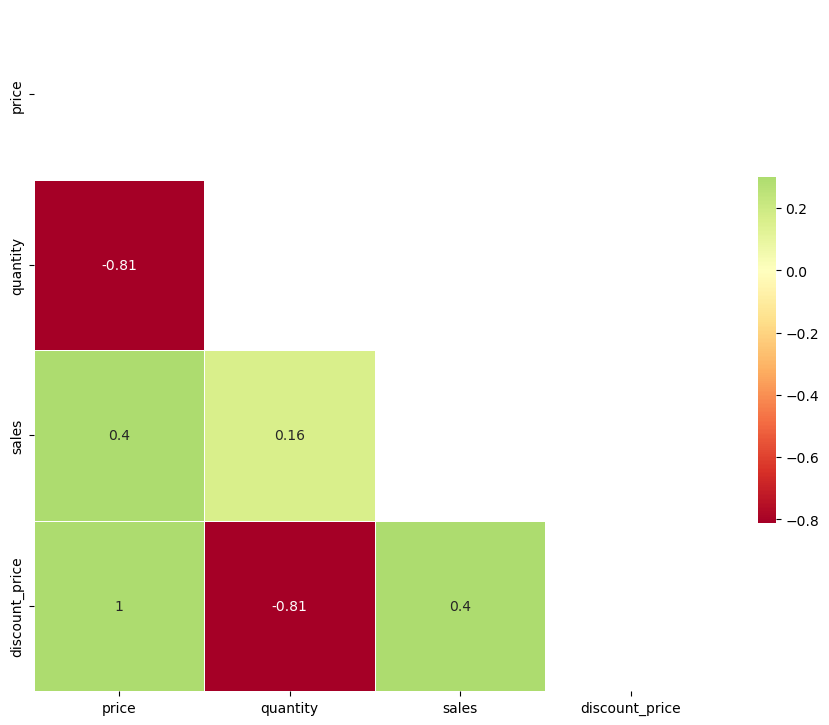

In [112]:
me6 = me[['price', 'quantity', 'sales', 'discount_price']]
corr = me6.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap='RdYlGn',
vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [113]:
me.groupby('sales_group', group_keys = False).apply(lambda x: x.sample(min(len(x),1)))

,store,customer,price,quantity,sales,discount_price,sales_group,cust_sales_group
2,1,C,6,30,180,5.70,high,C_high
3,2,A,1,70,70,0.95,low,A_low
4,2,B,2,60,120,1.90,medium,B_medium


In [114]:
c = np.random.choice(me.sales_group.unique(), size=1, replace=False)
me7 = me[me['sales_group'].isin(c)]

In [117]:
me.filter

,store,customer,price,quantity,sales,discount_price,sales_group,cust_sales_group
0,1,A,4,10,40,3.80,low,A_low
1,1,B,5,20,100,4.75,medium,B_medium
2,1,C,6,30,180,5.70,high,C_high
3,2,A,1,70,70,0.95,low,A_low
4,2,B,2,60,120,1.90,medium,B_medium
5,2,C,3,50,150,2.85,high,C_high


In [118]:
gender=['male','female']
customer=["Smith", 'Jenny']

In [120]:
print(pd.DataFrame({"gender":gender, "customer": customer}))

   gender customer
0    male    Smith
1  female    Jenny


Text(0, 0.5, 'Average Sales')

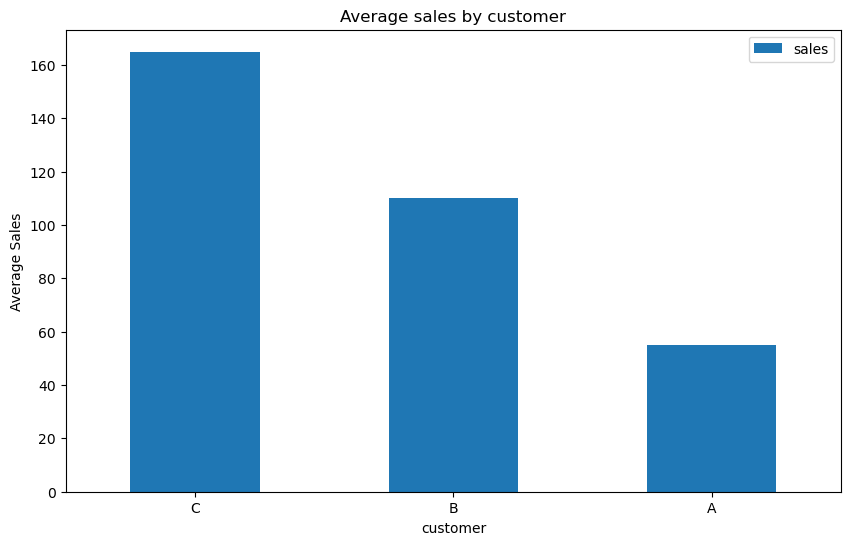

In [129]:
me[['customer', 'sales']].groupby('customer').mean().sort_values(by='sales', ascending=False).plot.bar(figsize=(10,6),\
rot = 360, title='Average sales by customer')
plt.xlabel('customer')
plt.ylabel('Average Sales')

In [133]:
my_lambda=lambda x: (x+4) + (x*x) - 4

In [138]:
print(my_lambda(4))

20


In [150]:
from array import array
import array as arr

In [178]:
a1 = np.array([1, 2, 3, 4])
a2 = np.array(([10, 20, 30, 40], [100, 200, 300, 400]))
a3 = np.vstack([a1, a2])

In [180]:
me

,store,customer,price,quantity,sales,discount_price,sales_group,cust_sales_group
0,1,A,4,10,40,3.80,low,A_low
1,1,B,5,20,100,4.75,medium,B_medium
2,1,C,6,30,180,5.70,high,C_high
3,2,A,1,70,70,0.95,low,A_low
4,2,B,2,60,120,1.90,medium,B_medium
5,2,C,3,50,150,2.85,high,C_high


In [190]:
me10 = me.iloc[:,[0,1,2,3,4,5]]
me10 = pd.DataFrame(me10)

In [192]:
me10 = me10.loc[len(me10.index)] = [3, 'A', 5, 80, 110, 4.75]

AttributeError: 'list' object has no attribute 'loc'

In [198]:
me10 = me[['customer', 'store', 'price', 'quantity', 'sales', 'discount_price']]

,customer,store,price,quantity,sales,discount_price
0,A,1,4,10,40,3.80
1,B,1,5,20,100,4.75
2,C,1,6,30,180,5.70
3,A,2,1,70,70,0.95
4,B,2,2,60,120,1.90
5,C,2,3,50,150,2.85


In [203]:
me10  = me.groupby('customer').sum()
me10

,store,price,quantity,sales,discount_price
customer,,,,,
A,3,5,80,110,4.75
B,3,7,80,220,6.65
C,3,9,80,330,8.55


In [204]:
me.groupby('customer').sum()

,store,price,quantity,sales,discount_price
customer,,,,,
A,3,5,80,110,4.75
B,3,7,80,220,6.65
C,3,9,80,330,8.55
